In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_annotation(file_name='data/annotation.npz'):
    """ The values of this volume correspond to the ID/index of the structures
    dataframe. The value 0 indicates that the voxel is not labeled or part of the brain.
    """
    return np.load(file_name)['arr_0']


def read_signal(file_name='data/signal.npz'):
    """ Treat this as a generic brain-wide measurement we would like
    to quantify by structure. 
    """
    return np.load(file_name)['arr_0']

def read_structures(file_name='data/structures.csv'):
    """ columns in this dataframe:
      index = ID of structure
      acronym = abbreviation of structure's name
      name = longer version of structure's name
      color_hex_triplet = hexademical representation you can use for color in visualizations
      graph_order = sort structures by this value if you want a ~anatomical linear ordering
      structure_id_path = '/' delimited structure IDs describing structure ancestry  
        - right-most ID matches the current row index/ID
        - left-most is always the tree's root structure ID
        - in between are parent/grandparent/etc structure IDs all the way to the root
    """
    return pd.read_csv(file_name, index_col=0).set_index(['id'])


def plot_slices_from_volume(ipt_img, cmap='gray', title=' '):
    """
    Extract slices from 3D volume for visualization in three directions
    """
    vol_shape = ipt_img.shape
    slice_loc = 2
    num_per_fig = 3
    figsize = (18, 6)
    fontsize=20
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(1, num_per_fig, 1)
    im = ax.imshow(ipt_img[vol_shape[0] // slice_loc, :, :], cmap=cmap)
    ax.label_outer()
    ax.set_title(title, fontsize=fontsize)
    fig.colorbar(im, ax=ax)

    ax = fig.add_subplot(1, num_per_fig, 2)
    im = ax.imshow(ipt_img[:, vol_shape[1] // slice_loc, :], cmap=cmap)
    ax.label_outer()
    ax.set_title(title, fontsize=fontsize)
    fig.colorbar(im, ax=ax)

    ax = fig.add_subplot(1, num_per_fig, 3)
    im = ax.imshow(ipt_img[:, :, vol_shape[2] // slice_loc], cmap=cmap)

    ax.label_outer()
    ax.set_title(title, fontsize=fontsize)
    fig.colorbar(im, ax=ax)
    
    plt.subplots_adjust(wspace=0.015, hspace=0.015)
    plt.savefig('./image/'+ title + '.png', bbox_inches = 'tight', pad_inches = 0.01)
#     plt.close()

## Read in signal volume and its corresponding annotation volume

In [2]:
annotation_volume = read_annotation()
print(annotation_volume.shape)

signal_volume = read_signal()
print(signal_volume.shape)

structures_df = read_structures()


(132, 80, 114)
(132, 80, 114)


## Convert hex string to integer, update annotation volume values

In [3]:
labels = list(set(structures_df.index.values.tolist()))
colors = list(structures_df['color_hex_triplet'].values.tolist())
print(len(colors), len(labels))

for label in labels:
    color_number = int(structures_df['color_hex_triplet'][label], 16)
    annotation_volume[ annotation_volume == label ] = color_number

1327 1327


## Visualize images in three directions

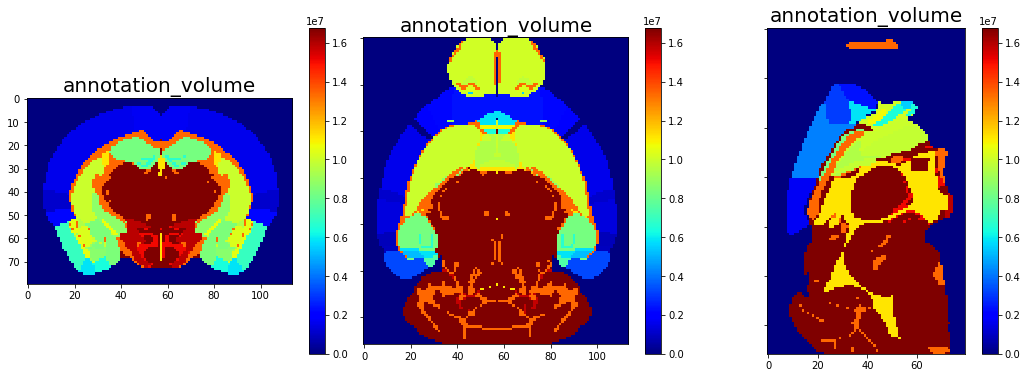

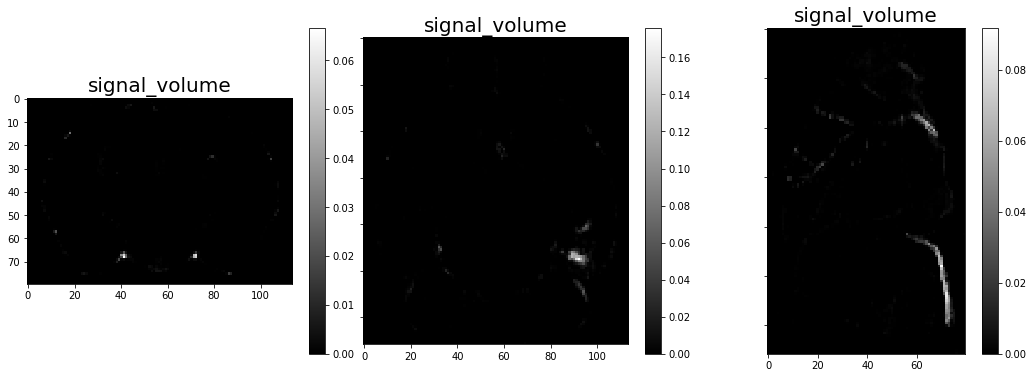

In [4]:
plot_slices_from_volume(annotation_volume, cmap='jet', title='annotation_volume')
# plot_slices_from_volume(annotation_volume, cmap='viridis', title='annotation_volume')

plot_slices_from_volume(signal_volume, cmap='gray', title='signal_volume')